## Test deconvolution imports

Before testing the dependencies make sure you are in the new devbio-napari based environment you created in the last section.  Type the following.

```
mamba activate decon-dl-env
```

Now test whether the dependencies have been installed properly

In [1]:
try:
    import imnotthere as int
    imnothtere_found=True
    print('ImNotThere found')
except ImportError:
    imnotthere_found=False
    print('!ImNotThere NOT found')

try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
    print('clij2fft found')
except ImportError:
    clij2_rl_found=False
    print('!clij2fft NOT found')
    
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
    print('RLF found')
except ImportError:
    redlionfish_rl_found=False
    print('!RLF NOT found')
    
try:
    import cupy as cp
    from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
    cupy_found=True
    print('cupy found')
except ImportError:
    cupy_found=False
    print('!cupy NOT found')

import numpy as np
    

!ImNotThere NOT found
clij2fft found
RLF found
cupy found



## Get test data 

1.  Get images and models from this link https://www.dropbox.com/scl/fo/yc5jaoj3ap936dqqy8urc/h?rlkey=ho8vp2nbvprzyltytryj9demp&dl=0
2.  Place both the ```data``` and ```models``` folders beside the ```docs``` folder.
3.  Use imread to verify you can open the image, then print the size of the image and verify it is ```(128,256,256)```


In [12]:
from skimage.io import imread
from pathlib import Path
# local path to the data folder
image_path = Path('../../data/deconvolution/')

image_name='Bars-G10-P30-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

im=imread(image_path / image_name)
psf=imread(image_path / psf_name)
truth=imread(image_path / truth_name)
im=im.astype('float32')
psf=psf.astype('float32')
psf=psf/psf.sum()
print(im.shape, psf.shape, truth.shape)

(128, 256, 256) (128, 256, 256) (128, 256, 256)


## View 3D Data in notebook

View the data using the xy, xz, and zy max projections from tnia-python.  

Text(0.5, 0.98, 'Image')

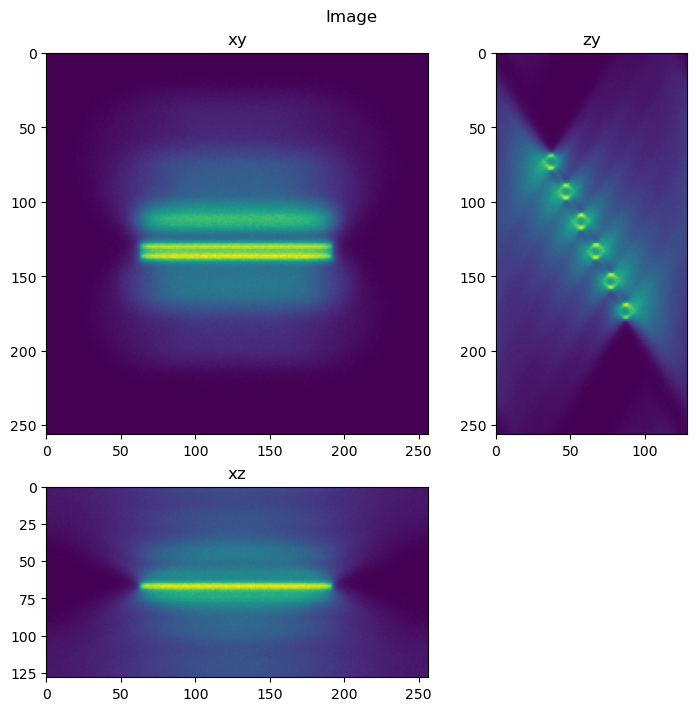

In [13]:
from tnia.plotting.projections import show_xyz_slice_center 

fig = show_xyz_slice_center(im, figsize=(7,7))
fig.suptitle('Image')

## Use stackview to explore data

Alternatively we can use the [stackview](https://github.com/haesleinhuepf/stackview) library to explore the data. 

In [4]:
import stackview
stackview.orthogonal(psf, continuous_update=True)
stackview.orthogonal(truth, continuous_update=True)
stackview.orthogonal(im, continuous_update=True)


## import helper and show image

tnia available
stackview available


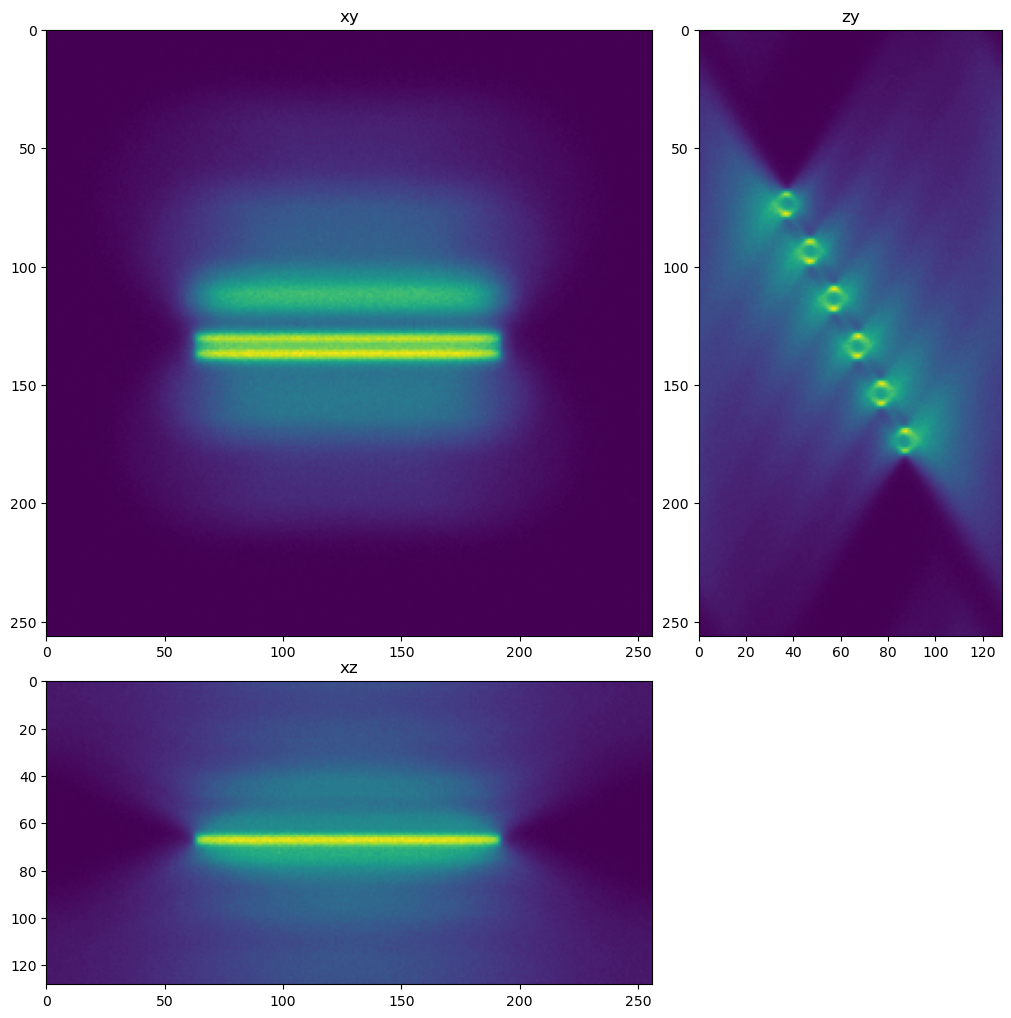

In [5]:
import sys
sys.path.append('../')

import decon_helper as dh

dh.show_xyz_slice(im, 'tnia')

## Import deconvolution libraries

Try importing the clij2 and redlionfish implementations of Richardson Lucy.  If they are found perform a deconvolution with each library

In [6]:
try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
except ImportError:
    clij2_rl_found=False
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
except ImportError:
    redlionfish_rl_found=False

try:
    from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
    tnia_rl_cupy_found=True
except ImportError:
    tnia_rl_cupy_found=False
    
print('clij2 rl found',clij2_rl_found)
print('redlionfish rl found',redlionfish_rl_found)    
print('tnia rl cupy found',tnia_rl_cupy_found)

clij2 rl found True
redlionfish rl found True
tnia rl cupy found True


## Deconvolve with clij2

get lib
calling convcorr 0 0


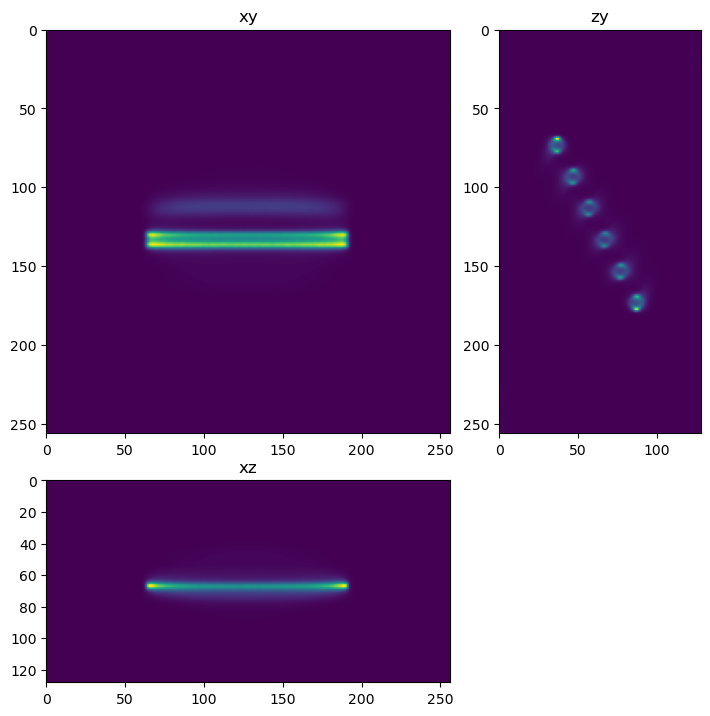

In [7]:
if clij2_rl_found==True:
    decon_clij2=richardson_lucy_nc(im,psf,100,0)
    show_xyz_slice_center(decon_clij2,figsize=(7,7))
else:
    print('clij2 not found')
    decon_clij2=np.zeros_like(im)

## Deconvolve with tnia-cupy


0 10 20 30 40 50 60 70 80 90 


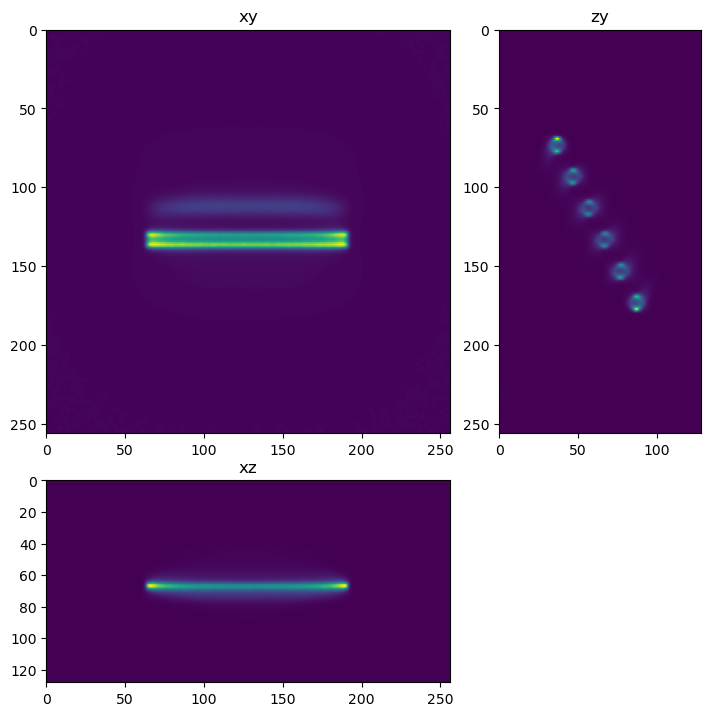

In [8]:
if tnia_rl_cupy_found:
    decon_tnia=richardson_lucy_cp(im,psf,100,True)
    show_xyz_slice_center(decon_tnia,figsize=(7,7))

## Look at the deconvolution result with stackview

In [9]:
stackview.orthogonal(decon_clij2, continuous_update=True)

## Deconvolve with redlionfish

In [10]:
if redlionfish_rl_found==True:
    decon_rlf=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=100, method='gpu', resAsUint8=False )
else:
    print('redlionfish not found')
    decon_rlf=np.zeros_like(im)

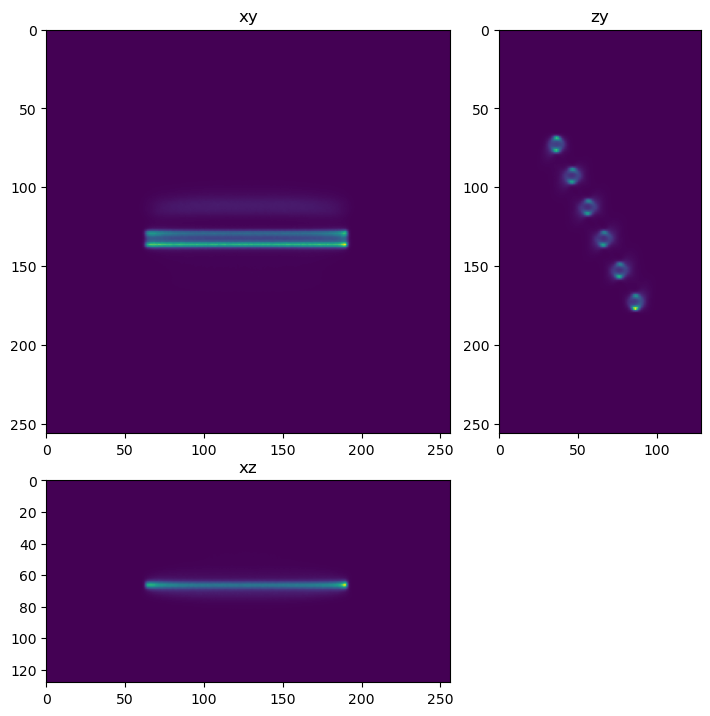

In [11]:
fig=show_xyz_slice_center(decon_rlf, figsize=(7,7))

## View data in Napari and ask questions

View the data in Napari, switch to a 3D view and rotate and explore the dataset?  How good is the reconstruction?  Is it a truer representation of the data as compared to the image?  

Excercise: Deconvolve the data for 1000 iterations, or 10,000 if you have a fast GPU (or even 100,000 if you have a fast GPU and a bit of time).  Does the reconstruction continue to improve with more iterations?

In [17]:
import napari
viewer=napari.Viewer()
viewer.add_image(im)
viewer.add_image(decon_clij2)
viewer.add_image(decon_rlf)
viewer.add_image(truth)

<Image layer 'truth' at 0x1d228e14bb0>